In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/headbrain.csv')
df.head(3)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335


In [3]:
df.shape

(237, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


<AxesSubplot:>

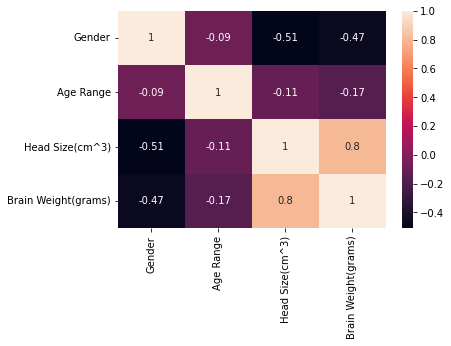

In [17]:
matrix = df.corr().round(2)
sns.heatmap(data=matrix, annot=True)

In [5]:
df.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:,  -1].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_test_pred = model.predict(X_test)

In [11]:
y_test_pred

array([1309.13014959, 1298.70362709, 1372.33036648, 1251.95142497,
       1313.08876141, 1264.88001285, 1480.38705414, 1263.86956331,
       1398.8080217 , 1313.22116259, 1391.76161295, 1127.43948907,
       1186.91806057, 1325.41101526, 1204.21660925, 1241.5947198 ,
       1287.32923892, 1344.84226173, 1251.07337661, 1299.04515875,
       1262.3153636 , 1402.66206828, 1342.70956394, 1292.41009898,
       1344.30574502, 1331.03562549, 1178.08771916, 1305.44325209,
       1466.64300177, 1103.68026318, 1175.06973955, 1267.35424229,
       1225.06965424, 1375.71771369, 1358.28676382, 1235.43359287,
       1327.85049679, 1347.34432712, 1323.04135106, 1243.89456668,
       1331.09820935, 1176.29655303, 1158.89343911, 1361.36732729,
       1424.69994537, 1286.24897205, 1232.58999583, 1171.92659223,
       1162.21096899, 1127.91342191, 1206.82323987, 1284.65279097,
       1264.51064524, 1428.90275707, 1221.14579033, 1203.68009255,
       1154.39107712, 1196.33413352, 1300.05560829, 1097.10778

In [12]:
y_test

array([1280, 1321, 1425, 1250, 1350, 1408, 1440, 1210, 1422, 1405, 1362,
       1150, 1175, 1430, 1120, 1192, 1163, 1360, 1160, 1355, 1225, 1370,
       1440, 1300, 1275, 1350, 1127, 1355, 1620, 1027, 1142, 1250, 1103,
       1280, 1340, 1322, 1374, 1296, 1240, 1132, 1390, 1340, 1168, 1405,
       1485, 1255, 1140, 1202, 1080, 1022, 1220, 1230, 1245, 1405, 1195,
       1265, 1078, 1250, 1470, 1060, 1178, 1125, 1220, 1226, 1358, 1380,
       1240, 1590, 1290, 1175, 1241, 1335], dtype=int64)

In [13]:
accuracy = model.score(X_test, y_test)
print(accuracy)

0.669439453496578


In [14]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2 = r2_score(y_train, y_train_pred)
print('Training Score:')
print('rmse = {:.2f}'.format(rmse))
print('r2   = {:.2f}'.format(r2))


Training Score:
rmse = 70.52
r2   = 0.64


In [16]:
mse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)
print('Testing Score:')
print('rmse = {:.2f}'.format(rmse))
print('r2   = {:.2f}'.format(r2))

Testing Score:
rmse = 70.52
r2   = 0.67
